# VISUAL ANALYTICS LAB PROJECT - PASSNYC EDA

## 1. Introduction

#### PASSNYC is a not-for-profit organization that facilitates a collective impact that is dedicated to broadening educational opportunities for New York City's talented and underserved students. New York City is home to some of the most impressive educational institutions in the world, yet in recent years, the City’s specialized high schools - institutions with historically transformative impact on student outcomes - have seen a shift toward more homogeneous student body demographics.

#### This dataset is collected from Kaggle, provided by PASSNYC which is a non-for-profit organization that facilitates a collective impact that is dedicated to broadening educational opportunities for New York City's talented and underserved students. And the dataset is a public data used to identify students within New York City’s under-performing school districts. PASSNYC aims to increase the diversity of students taking the Specialized High School Admissions Test (SHSAT) through consulting and collaboration with partners. By focusing efforts in under-performing areas that are historically underrepresented in SHSAT registration, it might help to pave the path to specialized high schools for a more diverse group of students

## 2. Loading libraries and retrieving data¶

In [235]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
import math
import warnings
warnings.filterwarnings('ignore')
#for use of mapbox
import plotly.express as px

In [373]:
# Importing data
df = pd.read_csv('datasets/2016 School Explorer.csv')
high_school_df = pd.read_csv('datasets/D5 SHSAT Registrations and Testers.csv')

In [374]:
def floater(x):
    return float(x.strip('%'))

## 3. Data Impressions

In [375]:
#We have 3 rows × 161 columns
df.head(3)

Adjusted Grade New? Other Location Code in LCGMS                School Name  \
0            NaN  NaN                          NaN  P.S. 015 ROBERTO CLEMENTE   
1            NaN  NaN                          NaN        P.S. 019 ASHER LEVY   
2            NaN  NaN                          NaN       P.S. 020 ANNA SILVER   

       SED Code Location Code  District   Latitude  Longitude  \
0  310100010015        01M015         1  40.721834 -73.978766   
1  310100010019        01M019         1  40.729892 -73.984231   
2  310100010020        01M020         1  40.721274 -73.986315   

                    Address (Full)  ... Grade 8 Math - All Students Tested  \
0  333 E 4TH ST NEW YORK, NY 10009  ...                                  0   
1   185 1ST AVE NEW YORK, NY 10003  ...                                  0   
2  166 ESSEX ST NEW YORK, NY 10002  ...                                  0   

   Grade 8 Math 4s - All Students  \
0                               0   
1                               0   
2                               0   

  Grade 8 Math 4s - American Indian or Alaska Native  \
0                                                  0   
1                                                  0   
2                                                  0   

  Grade 8 Math 4s - Black or African American  \
0                                           0   
1                                           0   
2                                           0   

  Grade 8 Math 4s - Hispanic or Latino  \
0                                    0   
1                                    0   
2                                    0   

  Grade 8 Math 4s - Asian or Pacific Islander  Grade 8 Math 4s - White  \
0                                           0                        0   
1                                           0                        0   
2                                           0                        0   

  Grade 8 Math 4s - Multiracial Grade 8 Math 4s - Limited English Proficient  \
0                             0                                            0   
1                             0                                            0   
2                             0                                            0   

  Grade 8 Math 4s - Economically Disadvantaged  
0                                            0  
1                                            0  
2                                            0  

[3 rows x 161 columns]

## 4. Data Preperation

In [376]:
#Transfer the number into float type
df["School Income Estimate"] = df["School Income Estimate"].replace('[\$,]', '', regex=True).astype(float)
color_brewer = ['#57B8FF','#B66D0D','#009FB7','#FBB13C','#FE6847','#4FB5A5','#8C9376','#F29F60','#8E1C4A','#85809B','#515B5D','#9EC2BE','#808080','#9BB58E','#5C0029','#151515','#A63D40','#E9B872','#56AA53','#CE6786','#449339','#2176FF','#348427','#671A31','#106B26','008DD5','#034213','#BC2F59','#939C44','#ACFCD9','#1D3950','#9C5414','#5DD9C1','#7B6D49','#8120FF','#F224F2','#C16D45','#8A4F3D','#616B82','#443431','#340F09']

In [377]:
#Changing the percents to str because it was object before plus removing special characters
df["Percent Asian"] = df["Percent Asian"].astype(str).apply(floater)
df["Percent Black"] = df["Percent Black"].astype(str).apply(floater)
df["Percent Hispanic"] = df["Percent Hispanic"].astype(str).apply(floater)
df["Percent White"] = df["Percent White"].astype(str).apply(floater)
df["Percent Others"] = (df["Percent Black"] + df["Percent Hispanic"] + df["Percent White"] + df["Percent Asian"]).sub(100).mul(-1)
df["Rigorous Instruction %"] = df["Rigorous Instruction %"].astype(str).apply(floater)
df["Collaborative Teachers %"] = df["Collaborative Teachers %"].astype(str).apply(floater)
df["Supportive Environment %"] = df["Supportive Environment %"].astype(str).apply(floater)
df["Effective School Leadership %"] = df["Effective School Leadership %"].astype(str).apply(floater)
df["Strong Family-Community Ties %"] = df["Strong Family-Community Ties %"].astype(str).apply(floater)
df["Trust %"] = df["Trust %"].astype(str).apply(floater)
df["Student Attendance Rate"] = df["Student Attendance Rate"].astype(str).apply(floater)
df["Percent of Students Chronically Absent"] = df["Percent of Students Chronically Absent"].astype(str).apply(floater)

#adjust column name
df = df.rename(columns = {"Rigorous Instruction %":"Rigorous Instruction", "Collaborative Teachers %":"Collaborative Teachers", 
                          "Supportive Environment %":"Supportive Environment", "Effective School Leadership %":"Effective School Leadership",
                          "Strong Family-Community Ties %":"Strong Family-Community Ties", "Trust %":"Trust"}) 


## 5. Data Cleaning

In [378]:
#Delete useless columns(one to third have too much missing value)
df = df.drop(["Adjusted Grade", "New?", "Other Location Code in LCGMS", "Grade Low", "Grade High"], axis=1)
odf = df
#We dodn't know how to judge the target is meeting or not, so drop these categorical columns
df = df[df.columns.drop(list(df.filter(regex='Rating')))]

In [379]:
#Summary of missing values(per column)
df.isnull().sum()

School Name                                     0
SED Code                                        0
Location Code                                   0
District                                        0
Latitude                                        0
                                               ..
Grade 8 Math 4s - White                         0
Grade 8 Math 4s - Multiracial                   0
Grade 8 Math 4s - Limited English Proficient    0
Grade 8 Math 4s - Economically Disadvantaged    0
Percent Others                                  0
Length: 150, dtype: int64

In [243]:
#Fill the missing value with mean value
df["Economic Need Index"] = df["Economic Need Index"].fillna(df["Economic Need Index"].mean())
df["School Income Estimate"] = df["School Income Estimate"].fillna(df["School Income Estimate"].mean())
df["Student Attendance Rate"] = df["Student Attendance Rate"].fillna(df["Student Attendance Rate"].mean())
df["Percent of Students Chronically Absent"] = df["Percent of Students Chronically Absent"].fillna(df["Percent of Students Chronically Absent"].mean())
df["Rigorous Instruction"] = df["Rigorous Instruction"].fillna(df["Rigorous Instruction"].mean())
df["Collaborative Teachers"] = df["Collaborative Teachers"].fillna(df["Collaborative Teachers"].mean())
df["Average ELA Proficiency"] = df["Average ELA Proficiency"].fillna(df["Average ELA Proficiency"].mean())
df["Average Math Proficiency"] = df["Average Math Proficiency"].fillna(df["Average Math Proficiency"].mean())
df["Percent Asian"] = df["Percent Asian"].fillna(df["Percent Asian"].mean())
df["Percent Black"] = df["Percent Black"].fillna(df["Percent Black"].mean())
df["Percent Hispanic"] = df["Percent Hispanic"].fillna(df["Percent Hispanic"].mean())
df["Percent White"] = df["Percent White"].fillna(df["Percent White"].mean())
#df["Percent Others"] = df["Percent Others"].fillna(df["Percent Others"].mean())
df["Rigorous Instruction"] = df["Rigorous Instruction"].fillna(df["Rigorous Instruction"].mean())
df["Collaborative Teachers"] = df["Collaborative Teachers"].fillna(df["Collaborative Teachers"].mean())
df["Supportive Environment"] = df["Supportive Environment"].fillna(df["Supportive Environment"].mean())
df["Effective School Leadership"] = df["Effective School Leadership"].fillna(df["Effective School Leadership"].mean())
df["Strong Family-Community Ties"] = df["Strong Family-Community Ties"].fillna(df["Strong Family-Community Ties"].mean())
df["Trust"] = df["Trust"].fillna(df["Trust"].mean())
df.isnull().sum()

School Name                                     0
SED Code                                        0
Location Code                                   0
District                                        0
Latitude                                        0
                                               ..
Grade 8 Math 4s - White                         0
Grade 8 Math 4s - Multiracial                   0
Grade 8 Math 4s - Limited English Proficient    0
Grade 8 Math 4s - Economically Disadvantaged    0
Percent Others                                  0
Length: 150, dtype: int64

In [244]:
#Dats Slice
df2 = df.iloc[:, 0:29]
grade = pd.DataFrame(df.filter(regex='All Students'))
df = pd.concat([df2, grade], axis=1)
df2.head(2)

School Name      SED Code Location Code  District   Latitude  \
0  P.S. 015 ROBERTO CLEMENTE  310100010015        01M015         1  40.721834   
1        P.S. 019 ASHER LEVY  310100010019        01M019         1  40.729892   

   Longitude                   Address (Full)      City    Zip  \
0 -73.978766  333 E 4TH ST NEW YORK, NY 10009  NEW YORK  10009   
1 -73.984231   185 1ST AVE NEW YORK, NY 10003  NEW YORK  10003   

                 Grades  ... Student Attendance Rate  \
0  PK,0K,01,02,03,04,05  ...                    94.0   
1  PK,0K,01,02,03,04,05  ...                    92.0   

   Percent of Students Chronically Absent  Rigorous Instruction  \
0                                    18.0                  89.0   
1                                    30.0                  96.0   

  Collaborative Teachers  Supportive Environment  Effective School Leadership  \
0                   94.0                    86.0                         91.0   
1                   96.0                    97.0                         90.0   

   Strong Family-Community Ties Trust  Average ELA Proficiency  \
0                          85.0  94.0                     2.14   
1                          86.0  94.0                     2.63   

   Average Math Proficiency  
0                      2.17  
1                      2.98  

[2 rows x 29 columns]

## 6.Analysis & Visualization

### 6.1 Correlation

In [100]:
#Plot the correlation heatmap
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

###### Through the correlation heatmap, it shows that the performance on ELA and Math are highly related to:
<ol>
<li>The amount of White students and Asian students</li>
<li>School Income Estimate</li>
</ol>

>Also, it shows the Average ELA Proficiency and Average Math Proficiency are related(the higher ELA score,the higher Math score)

###### So, generate the following plot to prove the relationship between ELA and Math

In [101]:
figure = ff.create_distplot([df["Average ELA Proficiency"],df["Average Math Proficiency"]],['ELA proficiency','Math proficiency'],bin_size=0.05,colors = ['#093A3E','#64E9EE'])
iplot(figure, filename='CT distplot')

>At the meantime, it shows that ELA Performance generally better than Math 

### 6.2 Economic need index 

##### Economic need index distribution

In [102]:
figure = ff.create_distplot([df["Economic Need Index"]],['ENI'],bin_size=0.01)
iplot(figure, filename='ENI distplot')

#### Box Plot and Violin Plot of Economic Need Index

In [103]:
t2 = go.Box(y=df["Economic Need Index"],name="Box plot")
t1 = go.Violin(y=df["Economic Need Index"],name="Violin plot")
fig = tools.make_subplots(rows=1, cols=2, shared_yaxes=True, print_grid=False)

fig.append_trace(t1, 1, 1)
fig.append_trace(t2, 1, 2)

fig['layout'].update(height=600, width=800, title='Economic Need Index distribution')
iplot(fig, filename='ENI Box Violin')

#### Average Economic Need Index in different cities

In [104]:
dframe = [('City', df["City"].value_counts(sort=True).index),('Mean ENI',[round(df["Economic Need Index"][df["City"]==i].mean(),3) for i in list(df["City"].value_counts(sort=True).index)])]
dframe = pd.DataFrame.from_items(dframe)
dframe = dframe.sort_values(['Mean ENI'],ascending=[False],axis=0)
data = [go.Bar(
            x=dframe["City"],
            y=dframe["Mean ENI"],
            text=dframe["Mean ENI"],
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6
        )]

iplot(data, filename='bar-direct-labels')

>Schools in Rockaway, Bronx and Arverne are in dire need of financial help while Whitestone, Little Neck and Douglaston are financially stable.

### 6.3 School Income Estimate

#### School Income distribution for community schools

In [105]:
trace0 = go.Box(x=df["School Income Estimate"][df["Community School?"]=="Yes"],name="Community School",boxmean=True)
trace1 = go.Box(x=df["School Income Estimate"][df["Community School?"]=="No"],name="Private School",boxmean=True)
data = [trace0, trace1]
layout = go.Layout(
    title = "Box Plot of estimated income of Community and Private schools",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

### 6.4 Economic Need Index vs. School Income Estimate

In [106]:
colorscale = ['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
fig = ff.create_2d_density(
    df["Economic Need Index"], df["School Income Estimate"], colorscale=colorscale,
    hist_color='rgb(255, 237, 222)', point_size=3, title="Economic Need Index vs. School Income Estimate"
)
fig.layout.yaxis.update({'title': 'School Income Estimate'})
fig.layout.xaxis.update({'title': 'Economic Need Index'})
iplot(fig, filename='histogram_subplots')

>Economic Need Index and School Income Estimate are inversely proportional to each other. More the economic need index lesser the estimated income.

#### Bubble chart depicting estimated income and economic need index on map of school locations

In [186]:
data = [
    {
        'x': df["Latitude"],
        'y': df["Longitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"].mul(100),
            'size': df["School Income Estimate"].div(5000),
            'showscale': True
        }
    }
]

iplot(data, filename='scatter-colorscale')

>The schools have similar econimic needd are gathered at same area

#### Mapping the school location on real map

In [108]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="District", hover_data=["District"],
                        color_discrete_sequence=["goldenrod"], zoom=9, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(center=go.layout.mapbox.Center(lat=45,lon=-73))
fig.show()

>The higher income estimate, the lower income needs and the schools having similar financial condition that gather together


### 6.5 Racial distribution analysis

#### Average racial distribution in schools of different cities

In [298]:
data = []
city_list = list(df["City"].value_counts().index)
for i in city_list:
    data.append(
        go.Bar(
          y = [df["Percent Asian"][df["City"] == i].mean(), df["Percent Black"][df["City"] == i].mean(), df["Percent Hispanic"][df["City"] == i].mean(), df["Percent White"][df["City"] == i].mean()],
          x = ['Asian','Black','Hispanic', 'White'],
          name = i,
          opacity = 0.6
        )
    )
k=0
fig = tools.make_subplots(rows=15, cols=3, subplot_titles=city_list, print_grid=False)
for i in range(1,16):
    for j in range(1,4):
        fig.append_trace(data[k], i, j)
        k = k + 1
fig['layout'].update(height=2000, title='Average racial distribution in different cities',showlegend=False)
iplot(fig, filename='make-subplots-multiple-with-titles')

>Show the composition of student's race for each city 
>Find out that he Asian population are mostly living in Central New York.

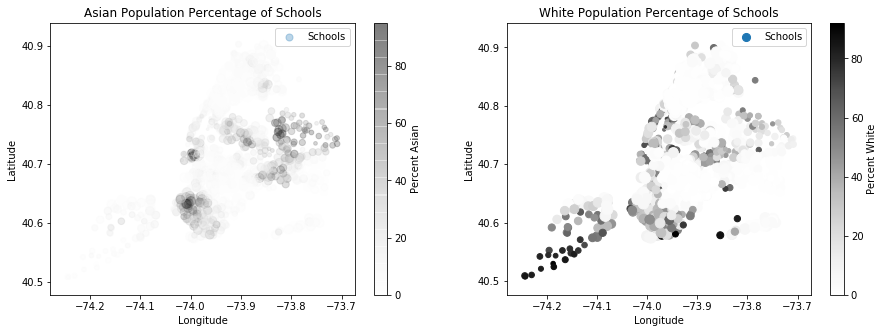

In [134]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=df['Economic Need Index']*100, c="Percent Asian", label='Schools', title='Asian Population Percentage of Schools',
    colorbar=True, alpha=0.3, figsize=(15,5))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=df['Economic Need Index']*130, c="Percent White", label='Schools', title='White Population Percentage of Schools',
    colorbar=True, alpha=1, figsize=(15,5))

plt.legend()
plt.show()

>The White Population has a very noticeable cluster near the edge and lower parts of New York.

#### Comparing distribution of races with each other with Economic Need Index

In [135]:
fig = ff.create_scatterplotmatrix(df.loc[:,["Economic Need Index","Percent Asian","Percent Black","Percent Hispanic","Percent White","Percent Others"]], index='Economic Need Index', diag='box', size=2, height=800, width=800)
iplot(fig, filename ='Scatterplotmatrix')

#### Racial distribution in community and private schools

In [300]:
data = [
    go.Scatterpolar(
      r = [df["Percent Asian"][df["Community School?"] == "Yes"].mean(), df["Percent Black"][df["Community School?"] == "Yes"].mean(), df["Percent Hispanic"][df["Community School?"] == "Yes"].mean(), df["Percent White"][df["Community School?"] == "Yes"].mean(), df["Percent Asian"][df["Community School?"] == "Yes"].mean()],
      theta = ['Asian','Black','Hispanic', 'White', 'Asian'],
      fill = 'toself',
      name = 'Community School'
    ),
    go.Scatterpolar(
      r = [df["Percent Asian"][df["Community School?"] == "No"].mean(), df["Percent Black"][df["Community School?"] == "No"].mean(), df["Percent Hispanic"][df["Community School?"] == "No"].mean(), df["Percent White"][df["Community School?"] == "No"].mean(), df["Percent Asian"][df["Community School?"] == "No"].mean()],
      theta = ['Asian','Black','Hispanic', 'White', 'Asian'],
      fill = 'toself',
      name = 'Not Community School'
    )
]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 60]
    )
  ),
  showlegend = True,
  title = "Racial distribution in community and private schools"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "radar/multiple")

>Community School has more Balck and Hispannic student,and in the opposite, Not Community School has more White and Asian student.

### 6.6 Rigorous instruction analysis

#### Rigorous instruction % distribution

In [137]:
figure = ff.create_distplot([df["Rigorous Instruction"]],['RI%'],bin_size=1,colors = ['#F0B100'])
iplot(figure, filename='RI distplot')

#### Rigorous instruction ratings statistical analysis

In [140]:
trace1 = go.Bar(
    y=odf["Rigorous Instruction Rating"].value_counts(sort=True).index,
    x=odf["Rigorous Instruction Rating"].value_counts(sort=True).values,
    text=odf["Rigorous Instruction Rating"].value_counts(sort=True).values,
    textposition='auto',
    name='Frequency',
    orientation = 'h',
    marker = dict(
        color = 'rgba(246, 78, 139, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=list(odf["Rigorous Instruction Rating"].unique()),
    x=[odf["Rigorous Instruction"][odf["Rigorous Instruction Rating"] == i].mean() for i in list(odf["Rigorous Instruction Rating"].unique())],
    text=[odf["Rigorous Instruction"][odf["Rigorous Instruction Rating"] == i].mean() for i in list(odf["Rigorous Instruction Rating"].unique())],
    textposition='auto',
    name='Mean',
    orientation = 'h',
    marker = dict(
        color = 'rgba(58, 71, 80, 0.6)',
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=list(odf["Rigorous Instruction Rating"].unique()),
    x=[odf["Rigorous Instruction"][odf["Rigorous Instruction Rating"] == i].median() for i in list(odf["Rigorous Instruction Rating"].unique())],
    text=[odf["Rigorous Instruction"][odf["Rigorous Instruction Rating"] == i].median() for i in list(odf["Rigorous Instruction Rating"].unique())],
    textposition='auto',
    name='Median',
    orientation = 'h',
    marker = dict(
        color = 'rgba(0, 100, 100, 0.6)',
        line = dict(
            color = 'rgba(0, 100, 100, 1.0)',
            width = 3)
    )
)

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, shared_yaxes=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=400, width=800, title='Statistical analysis of rigorous instruction rating',margin=go.Margin(l=100),yaxis=dict(tickangle=45))
iplot(fig, filename='simple-subplot-with-annotations')

>Most school meet the target

### 6.7 Collaborative Teachers analysis

#### Collaborative teachers distribution

In [141]:
figure = ff.create_distplot([df["Collaborative Teachers"]],['CT%'],bin_size=1,colors = ['#E84855'])
iplot(figure, filename='CT distplot')

>It seems that most schools' teachers are highly collaborative

#### Collaborative teachers ratings statistical analysis

In [143]:
trace1 = go.Bar(
    y=odf["Collaborative Teachers Rating"].value_counts(sort=True).index,
    x=odf["Collaborative Teachers Rating"].value_counts(sort=True).values,
    text=odf["Collaborative Teachers Rating"].value_counts(sort=True).values,
    textposition='auto',
    name='Frequency',
    orientation = 'h',
    marker = dict(
        color = 'rgba(232, 72, 85, 0.6)',
        line = dict(
            color = 'rgba(232, 72, 85, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=list(odf["Collaborative Teachers Rating"].unique()),
    x=[odf["Collaborative Teachers"][odf["Collaborative Teachers Rating"] == i].mean() for i in list(odf["Collaborative Teachers Rating"].unique())],
    text=[odf["Collaborative Teachers"][odf["Collaborative Teachers Rating"] == i].mean() for i in list(odf["Collaborative Teachers Rating"].unique())],
    textposition='auto',
    name='Mean',
    orientation = 'h',
    marker = dict(
        color = 'rgba(255, 155, 113, 0.6)',
        line = dict(
            color = 'rgba(255, 155, 113, 1.0)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=list(odf["Collaborative Teachers Rating"].unique()),
    x=[odf["Collaborative Teachers"][odf["Collaborative Teachers Rating"] == i].median() for i in list(odf["Collaborative Teachers Rating"].unique())],
    text=[odf["Collaborative Teachers"][odf["Collaborative Teachers Rating"] == i].median() for i in list(odf["Collaborative Teachers Rating"].unique())],
    textposition='auto',
    name='Median',
    orientation = 'h',
    marker = dict(
        color = 'rgba(252, 176, 64, 0.6)',
        line = dict(
            color = 'rgba(252, 176, 64, 1.0)',
            width = 3)
    )
)

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, shared_yaxes=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=400, width=800, title='Statistical analysis of collaborative teachers rating',margin=go.Margin(l=100),yaxis=dict(tickangle=45))
iplot(fig, filename='simple-subplot-with-annotations')

### 6.8 Supportive Environment analysis

#### Supportive Environment distribution

In [144]:
figure = ff.create_distplot([df["Supportive Environment"]],['Supportive Environment'],bin_size=1,colors = ['#E88A20'])
iplot(figure, filename='SE distplot')

#### Supportive Environment ratings statistical analysis

In [146]:
trace1 = go.Bar(
    y=odf["Supportive Environment Rating"].value_counts(sort=True).index,
    x=odf["Supportive Environment Rating"].value_counts(sort=True).values,
    text=odf["Supportive Environment Rating"].value_counts(sort=True).values,
    textposition='auto',
    name='Frequency',
    orientation = 'h',
    marker = dict(
        color = 'rgba(62, 66, 75, 0.6)',
        line = dict(
            color = 'rgba(62, 66, 75, 1)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=list(odf["Supportive Environment Rating"].unique()),
    x=[odf["Supportive Environment"][odf["Supportive Environment Rating"] == i].mean() for i in list(odf["Supportive Environment Rating"].unique())],
    text=[odf["Supportive Environment"][odf["Supportive Environment Rating"] == i].mean() for i in list(odf["Supportive Environment Rating"].unique())],
    textposition='auto',
    name='Mean',
    orientation = 'h',
    marker = dict(
        color = 'rgba(232, 138, 32, 0.6)',
        line = dict(
            color = 'rgba(232, 138, 32, 1)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=list(odf["Supportive Environment Rating"].unique()),
    x=[odf["Supportive Environment"][odf["Supportive Environment Rating"] == i].median() for i in list(odf["Supportive Environment Rating"].unique())],
    text=[odf["Supportive Environment"][odf["Supportive Environment Rating"] == i].median() for i in list(odf["Supportive Environment Rating"].unique())],
    textposition='auto',
    name='Median',
    orientation = 'h',
    marker = dict(
        color = 'rgba(243, 186, 50, 0.6)',
        line = dict(
            color = 'rgba(243, 186, 50, 1)',
            width = 3)
    )
)

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, shared_yaxes=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=400, width=800, title='Statistical analysis of Supportive Environment rating',margin=go.Margin(l=100),yaxis=dict(tickangle=45))
iplot(fig, filename='simple-subplot-with-annotations')

### 6.9 Effective School Leadership analysis

#### Effective School Leadership distribution

In [148]:
figure = ff.create_distplot([df["Effective School Leadership"]],['Effective School Leadership'],bin_size=1,colors = ['#FFE046'])
iplot(figure, filename='ESL distplot')

#### Effective School Leadership ratings statistical analysis

In [151]:
trace1 = go.Bar(
    y=odf["Effective School Leadership Rating"].value_counts(sort=True).index,
    x=odf["Effective School Leadership Rating"].value_counts(sort=True).values,
    text=odf["Effective School Leadership Rating"].value_counts(sort=True).values,
    textposition='auto',
    name='Frequency',
    orientation = 'h',
    marker = dict(
        color = 'rgba(215, 38, 56, 0.6)',
        line = dict(
            color = 'rgba(215, 38, 56, 1)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=list(odf["Effective School Leadership Rating"].unique()),
    x=[odf["Effective School Leadership"][odf["Effective School Leadership Rating"] == i].mean() for i in list(odf["Effective School Leadership Rating"].unique())],
    text=[odf["Effective School Leadership"][odf["Effective School Leadership Rating"] == i].mean() for i in list(odf["Effective School Leadership Rating"].unique())],
    textposition='auto',
    name='Mean',
    orientation = 'h',
    marker = dict(
        color = 'rgba(244, 157, 55, 0.6)',
        line = dict(
            color = 'rgba(244, 157, 55, 1)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=list(odf["Effective School Leadership Rating"].unique()),
    x=[odf["Effective School Leadership"][odf["Effective School Leadership Rating"] == i].median() for i in list(odf["Effective School Leadership Rating"].unique())],
    text=[odf["Effective School Leadership"][odf["Effective School Leadership Rating"] == i].median() for i in list(odf["Effective School Leadership Rating"].unique())],
    textposition='auto',
    name='Median',
    orientation = 'h',
    marker = dict(
        color = 'rgba(65, 105, 225, 0.6)',
        line = dict(
            color = 'rgba(65, 105, 225, 1)',
            width = 3)
    )
)

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, shared_yaxes=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=400, width=800, title='Statistical analysis of Effective School Leadership rating',margin=go.Margin(l=100),yaxis=dict(tickangle=45))
iplot(fig, filename='simple-subplot-with-annotations')

### 6.10 Strong Family-Community Ties analysis

#### Strong Family-Community Ties distribution

In [152]:
figure = ff.create_distplot([df["Strong Family-Community Ties"]],['Strong Family-Community Ties'],bin_size=1,colors = ['#59CD90'])
iplot(figure, filename='SFCT distplot')

#### Strong Family-Community Ties ratings statistical analysis

In [155]:
trace1 = go.Bar(
    y=odf["Strong Family-Community Ties Rating"].value_counts(sort=True).index,
    x=odf["Strong Family-Community Ties Rating"].value_counts(sort=True).values,
    text=odf["Strong Family-Community Ties Rating"].value_counts(sort=True).values,
    textposition='auto',
    name='Frequency',
    orientation = 'h',
    marker = dict(
        color = 'rgba(249, 12, 74, 0.6)',
        line = dict(
            color = 'rgba(249, 12, 74, 1)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=list(odf["Strong Family-Community Ties Rating"].unique()),
    x=[odf["Strong Family-Community Ties"][odf["Strong Family-Community Ties Rating"] == i].mean() for i in list(odf["Strong Family-Community Ties Rating"].unique())],
    text=[odf["Strong Family-Community Ties"][odf["Strong Family-Community Ties Rating"] == i].mean() for i in list(odf["Strong Family-Community Ties Rating"].unique())],
    textposition='auto',
    name='Mean',
    orientation = 'h',
    marker = dict(
        color = 'rgba(75, 183, 236, 0.6)',
        line = dict(
            color = 'rgba(75, 183, 236, 1)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=list(odf["Strong Family-Community Ties Rating"].unique()),
    x=[odf["Strong Family-Community Ties"][odf["Strong Family-Community Ties Rating"] == i].median() for i in list(odf["Strong Family-Community Ties Rating"].unique())],
    text=[odf["Strong Family-Community Ties"][odf["Strong Family-Community Ties Rating"] == i].median() for i in list(odf["Strong Family-Community Ties Rating"].unique())],
    textposition='auto',
    name='Median',
    orientation = 'h',
    marker = dict(
        color = 'rgba(162, 59, 114, 0.6)',
        line = dict(
            color = 'rgba(162, 59, 114, 1)',
            width = 3)
    )
)

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, shared_yaxes=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=400, width=800, title='Statistical analysis of Strong Family-Community Ties rating',margin=go.Margin(l=100),yaxis=dict(tickangle=45))
iplot(fig, filename='simple-subplot-with-annotations')

### 6.11 Trust analysis

#### Trust distribution

In [156]:
figure = ff.create_distplot([df["Trust"]],['Trust'],bin_size=1,colors = ['#453E54'])
iplot(figure, filename='Trust distplot')

#### Trust ratings statistical analysis

In [159]:
trace1 = go.Bar(
    y=odf["Trust Rating"].value_counts(sort=True).index,
    x=odf["Trust Rating"].value_counts(sort=True).values,
    text=odf["Trust Rating"].value_counts(sort=True).values,
    textposition='auto',
    name='Frequency',
    orientation = 'h',
    marker = dict(
        color = 'rgba(255, 127, 80, 0.6)',
        line = dict(
            color = 'rgba(255, 127, 80, 1)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=list(odf["Trust Rating"].unique()),
    x=[odf["Trust"][odf["Trust Rating"] == i].mean() for i in list(odf["Trust Rating"].unique())],
    text=[odf["Trust"][odf["Trust Rating"] == i].mean() for i in list(odf["Trust Rating"].unique())],
    textposition='auto',
    name='Mean',
    orientation = 'h',
    marker = dict(
        color = 'rgba(240, 101, 67, 0.6)',
        line = dict(
            color = 'rgba(240, 101, 67, 1)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=list(odf["Trust Rating"].unique()),
    x=[odf["Trust"][odf["Trust Rating"] == i].median() for i in list(odf["Trust Rating"].unique())],
    text=[odf["Trust"][odf["Trust Rating"] == i].median() for i in list(odf["Trust Rating"].unique())],
    textposition='auto',
    name='Median',
    orientation = 'h',
    marker = dict(
        color = 'rgba(255, 180, 30, 0.6)',
        line = dict(
            color = 'rgba(255, 180, 30, 1)',
            width = 3)
    )
)

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, shared_yaxes=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=400, width=800, title='Statistical analysis of Trust rating',margin=go.Margin(l=100),yaxis=dict(tickangle=45))
iplot(fig, filename='simple-subplot-with-annotations')

>Visualizing the correlation between our features

#### Using our numeric features.let's take a look at our correlation matrix. Here are some interesting correlations:

In [308]:
#Select features
d = df2.iloc[:,[11,12,14,15,16,18,19,20,21,22,23,24,25,26]]

#Calculate the correlation
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

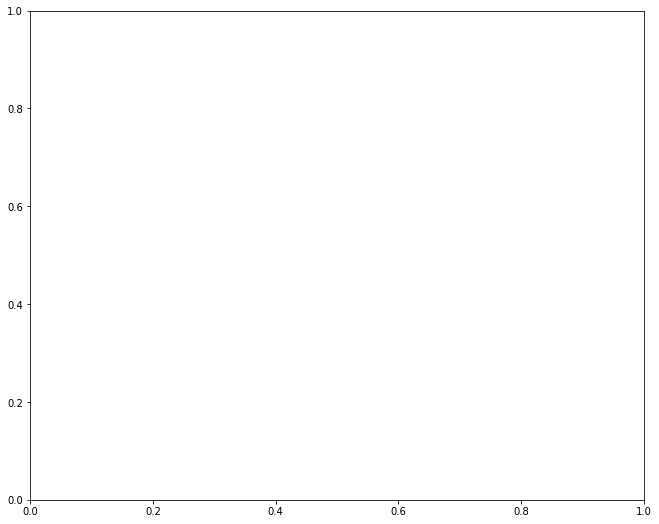

In [310]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

>Through all feature analysis above, the features are related(see the pink area), and the correlation heatmap proves this.

##### Economic Need Index
>Schools with more White Students have a lower economic need index, meaning the schools are operating just fine without the need of help.
>Schools with more Asian Students have a slightly lower economic need index.
>Schools with more Black/Hispanic Students have a higher economic need index, meaning the schools are in need of help.
>Schools with more Chronically Absent Students have a higher economic need index

##### School Income Estimate
>Schools with more White/Asian Students have a higher school income estimate.
>Schools with more Black/Hispanic Students have a lower school income estimate

### 6.12 KMeans clustering on explored features

#### Data preparation for clustering

In [260]:
d = df.loc[:,["Economic Need Index","School Income Estimate","Student Attendance Rate","Percent of Students Chronically Absent","Percent Asian","Percent Black","Percent Hispanic","Percent White","Rigorous Instruction","Collaborative Teachers","Supportive Environment","Effective School Leadership","Strong Family-Community Ties","Trust","Average Math Proficiency"]]
#d = d.convert_objects(convert_numeric=True)

In [261]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(d)
    wcss.append(kmeans.inertia_)

trace = go.Scatter(
    x = [i for i in range(1,11)],
    y = wcss
)
data = [trace]
iplot(data, filename='elbow-line')

#### Comparing different number of clusters

##### 3 Clusters

In [255]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(d)
d = d.as_matrix(columns=None)
trace0 = go.Scatter(
    x = d[y_kmeans == 0,0],
    y = d[y_kmeans == 0,1],
    mode = 'markers',
    name = 'Cluster 1'
)
trace1 = go.Scatter(
    x = d[y_kmeans == 1,0],
    y = d[y_kmeans == 1,1],
    mode = 'markers',
    name = 'Cluster 2'
)
trace2 = go.Scatter(
    x = d[y_kmeans == 2,0],
    y = d[y_kmeans == 2,1],
    mode = 'markers',
    name = 'Cluster 3'
)
'''
trace3 = go.Scatter(
    x = d[y_kmeans == 3,0],
    y = d[y_kmeans == 3,1],
    mode = 'markers',
    name = 'Cluster 4'
)
'''
data = [trace0, trace1, trace2]
iplot(data, filename='line-mode')

#### 4 Clusters

In [259]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(d)
d = d.as_matrix(columns=None)
trace0 = go.Scatter(
    x = d[y_kmeans == 0,0],
    y = d[y_kmeans == 0,1],
    mode = 'markers',
    name = 'Cluster 1'
)
trace1 = go.Scatter(
    x = d[y_kmeans == 1,0],
    y = d[y_kmeans == 1,1],
    mode = 'markers',
    name = 'Cluster 2'
)
trace2 = go.Scatter(
    x = d[y_kmeans == 2,0],
    y = d[y_kmeans == 2,1],
    mode = 'markers',
    name = 'Cluster 3'
)

trace3 = go.Scatter(
    x = d[y_kmeans == 3,0],
    y = d[y_kmeans == 3,1],
    mode = 'markers',
    name = 'Cluster 4'
)

data = [trace0, trace1, trace2, trace3]
iplot(data, filename='line-mode')

#### 5 Clusters

In [262]:
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(d)
d = d.as_matrix(columns=None)
trace0 = go.Scatter(
    x = d[y_kmeans == 0,0],
    y = d[y_kmeans == 0,1],
    mode = 'markers',
    name = 'Cluster 1'
)
trace1 = go.Scatter(
    x = d[y_kmeans == 1,0],
    y = d[y_kmeans == 1,1],
    mode = 'markers',
    name = 'Cluster 2'
)
trace2 = go.Scatter(
    x = d[y_kmeans == 2,0],
    y = d[y_kmeans == 2,1],
    mode = 'markers',
    name = 'Cluster 3'
)

trace3 = go.Scatter(
    x = d[y_kmeans == 3,0],
    y = d[y_kmeans == 3,1],
    mode = 'markers',
    name = 'Cluster 4'
)

trace4 = go.Scatter(
    x = d[y_kmeans == 4,0],
    y = d[y_kmeans == 4,1],
    mode = 'markers',
    name = 'Cluster 5'
)

data = [trace0, trace1, trace2, trace3, trace4]
iplot(data, filename='line-mode')

>3 Clusters has the best performance

In [197]:
# create figure
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = d[y_kmeans == 0,0],
    y = d[y_kmeans == 0,1],
    mode = 'markers',
    name = 'Cluster 1',
    marker=dict(color="DarkOrange"))
)
fig.add_trace(go.Scatter(
     x = d[y_kmeans == 1,0],
    y = d[y_kmeans == 1,1],
    mode = 'markers',
    name = 'Cluster 2',
    marker=dict(color="Crimson"))
)

fig.add_trace(go.Scatter(
    x = d[y_kmeans == 2,0],
    y = d[y_kmeans == 2,1],
    mode = 'markers',
    name = 'Cluster 3',
    marker=dict(color="RebeccaPurple")))

fig.add_trace(go.Scatter(
    x = d[y_kmeans == 3,0],
    y = d[y_kmeans == 3,1],
    mode = 'markers',
    name = 'Cluster 4',
    marker=dict(color="Green")
))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)


# Add buttons that add shapes
cluster0 = [go.layout.Shape(type="circle",
                            xref="x", yref="y",
                            x0=min(d[y_kmeans == 0,0]), y0=min(d[y_kmeans == 0,1]),
                            x1=max(d[y_kmeans == 0,0]), y1=max(d[y_kmeans == 0,1]),
                            line=dict(color="DarkOrange"))]
cluster1 = [go.layout.Shape(type="circle",
                            xref="x", yref="y",
                            x0=min(d[y_kmeans == 1,0]), y0=min(d[y_kmeans == 1,1]),
                            x1=max(d[y_kmeans == 1,0]), y1=max(d[y_kmeans == 1,1]),
                            line=dict(color="Crimson"))]
cluster2 = [go.layout.Shape(type="circle",
                            xref="x", yref="y",
                            x0=min(d[y_kmeans == 2,0]), y0=min(d[y_kmeans == 2,1]),
                            x1=max(d[y_kmeans == 2,0]), y1=max(d[y_kmeans == 2,1]),
                            line=dict(color="RebeccaPurple"))]
cluster3 = [go.layout.Shape(type="circle",
                            xref="x", yref="y",
                            x0=min(d[y_kmeans == 3,0]), y0=min(d[y_kmeans == 3,1]),
                            x1=max(d[y_kmeans == 3,0]), y1=max(d[y_kmeans == 3,1]),
                            line=dict(color="Green"))]

fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            type="buttons",
            buttons=[
                dict(label="None",
                     method="relayout",
                     args=["shapes", []]),
                dict(label="Cluster 0",
                     method="relayout",
                     args=["shapes", cluster0]),
                dict(label="Cluster 1",
                     method="relayout",
                     args=["shapes", cluster1]),
                dict(label="Cluster 2",
                     method="relayout",
                     args=["shapes", cluster2]),
                dict(label="Cluster 3",
                     method="relayout",
                     args=["shapes", cluster3]),
                dict(label="All",
                     method="relayout",
                     args=["shapes", cluster0 + cluster1 + cluster2 + cluster3])
            ],
        )
    ]
)

# Update remaining layout properties
fig.update_layout(
    title_text="Highlight Clusters",
    showlegend=False,
)

fig.show()

In [219]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [381]:
d2 = df2.loc[:,["Economic Need Index","School Income Estimate","Student Attendance Rate","Percent of Students Chronically Absent","Percent Asian","Percent Black","Percent Hispanic","Percent White","Rigorous Instruction","Collaborative Teachers","Supportive Environment","Effective School Leadership","Strong Family-Community Ties","Trust","Average Math Proficiency"]]
bin=[0.2,0.4,0.6,0.8]
d2["class"] =pd.cut(d2["Economic Need Index"], bin, labels=['LOW','MIDDLE','HIGH'])
d2

Economic Need Index  School Income Estimate  Student Attendance Rate  \
0                   0.919                31141.72                     94.0   
1                   0.641                56462.88                     92.0   
2                   0.744                44342.61                     94.0   
3                   0.860                31454.00                     92.0   
4                   0.730                46435.59                     93.0   
...                   ...                     ...                      ...   
1267                0.832                27243.69                     95.0   
1268                0.825                24172.46                     94.0   
1269                0.724                26422.05                     95.0   
1270                0.544                47192.42                     95.0   
1271                0.840                29096.71                     93.0   

      Percent of Students Chronically Absent  Percent Asian  Percent Black  \
0                                       18.0            5.0           32.0   
1                                       30.0           10.0           20.0   
2                                       20.0           35.0            8.0   
3                                       28.0            5.0           29.0   
4                                       23.0            4.0           20.0   
...                                      ...            ...            ...   
1267                                    13.0            0.0           20.0   
1268                                    24.0            0.0           68.0   
1269                                    12.0            0.0           54.0   
1270                                    12.0            2.0           86.0   
1271                                    22.0            1.0           28.0   

      Percent Hispanic  Percent White  Rigorous Instruction  \
0                 60.0            1.0                  89.0   
1                 63.0            6.0                  96.0   
2                 49.0            4.0                  87.0   
3                 63.0            4.0                  85.0   
4                 65.0           10.0                  90.0   
...                ...            ...                   ...   
1267              77.0            1.0                  94.0   
1268              31.0            1.0                  93.0   
1269              45.0            1.0                  97.0   
1270               9.0            1.0                  93.0   
1271              67.0            2.0                  87.0   

      Collaborative Teachers  Supportive Environment  \
0                       94.0                    86.0   
1                       96.0                    97.0   
2                       77.0                    82.0   
3                       78.0                    82.0   
4                       88.0                    87.0   
...                      ...                     ...   
1267                    93.0                    94.0   
1268                    90.0                    88.0   
1269                    92.0                    89.0   
1270                    91.0                    96.0   
1271                    84.0                    84.0   

      Effective School Leadership  Strong Family-Community Ties  Trust  \
0                            91.0                          85.0   94.0   
1                            90.0                          86.0   94.0   
2                            61.0                          80.0   79.0   
3                            73.0                          89.0   88.0   
4                            81.0                          89.0   93.0   
...                           ...                           ...    ...   
1267                         88.0                          83.0   94.0   
1268                         88.0                          88.0   93.0   
1269                         84.0   

In [382]:
X = d2.iloc[:,0:14]
y = d2.loc[:,"Economic Need Index"].values

In [383]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.18164991, -0.97820138,  0.14739462, ...,  0.96270862,
         0.30713944,  0.59034118],
       [-0.14981723,  0.45342736, -0.08380172, ...,  0.86012829,
         0.46806502,  0.59034118],
       [ 0.34349614, -0.23183852,  0.14739462, ..., -2.1147014 ,
        -0.49748846, -1.88496296],
       ...,
       [ 0.24770713, -1.245046  ,  0.26299279, ...,  0.24464628,
         0.46806502,  0.59034118],
       [-0.61439389, -0.07071359,  0.26299279, ...,  0.75754795,
         1.27269292,  0.75536146],
       [ 0.80328335, -1.09382386,  0.03179645, ..., -0.47341606,
         0.30713944, -1.05986158]])

In [384]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [385]:
finalDf = pd.concat([principalDf, d2[['class']]], axis = 1)
finalDf

principal component 1  principal component 2   class
0                  0.144440              -1.673130     NaN
1                 -1.529883              -1.432421    HIGH
2                  2.476583               2.109422    HIGH
3                  2.175956              -0.358863     NaN
4                  0.039837              -0.711417    HIGH
...                     ...                    ...     ...
1267              -0.340650              -1.699018     NaN
1268               0.234426              -1.867461     NaN
1269              -0.307915              -1.423214    HIGH
1270              -1.493274              -1.050297  MIDDLE
1271               1.921616              -0.398578     NaN

[1272 rows x 3 columns]

0       False
1       False
2       False
3       False
4       False
        ...  
1267    False
1268    False
1269    False
1270    False
1271    False
Name: class, Length: 1272, dtype: bool

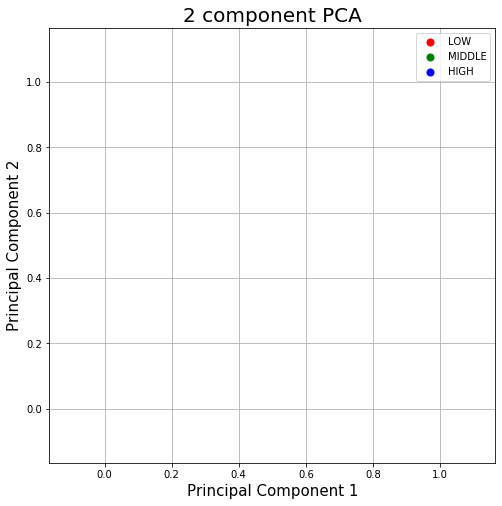

In [386]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['LOW', 'MIDDLE', 'HIGH']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == targets
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
indicesToKeep